## Read me
#### How to use
1. Put all data which read from Data Collector App into file "data". **Totally 8 files: battery.csv, cpuFreq.csv, cpuTime.csv, gpu.csv, memory.csv, net.csv, temperature.csv, time.csv**. Data generation frequency: 1/s.
2. Put all heat map photos which read from front side IR camera into file "FLIROne_front". Photo generation frequency: 1/5s.
3. Put all heat map photos which read from back side IR camera into file "FLIROne_back". Photo generation frequency: 1/5s.
4. "Cell" -> "Run All"

***Data preprocessing takes time, especially in the case of abstracting specific data from numpy array of heat map. It take 0.5s at least to deal with one heat map. Just be patient :) I will try to optimise it later... By Xiaoyang***

#### Code structure
1. Data preprocessing (Done)
2. ML Model. I set a Linear Regression here as a "Hello World" model, feel free to replace whatever model you like : )

###### Author: Xiaoyang Zhang      @@@      Email: xzhan211@binghamton.edu

### Import Libraries

In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### Time csv

In [94]:
Time = pd.read_csv('data/time.csv', sep='\t', names=["time"])
Time.drop(Time.index[len(Time)-1], inplace = True)
Time['time'] = Time['time'].astype(int)

In [95]:
Time.head()

,time
0,181018
1,181020
2,181021
3,181022
4,181023


In [96]:
Time.tail()

,time
613,182152
614,182153
615,182155
616,182156
617,182157


### Battery csv

In [97]:
Battery = pd.read_csv('data/battery.csv', sep=',', names=["bat_voltage", "bat_temp", "bat_capacity", "bat_current"])
Battery.drop(Battery.index[len(Battery)-1], inplace = True)
for x in list(Battery.columns.values):
    Battery[x] = Battery[x].astype(float)

In [98]:
Battery.head()

,bat_voltage,bat_temp,bat_capacity,bat_current
0,3834.0,25.0,52.0,309.0
1,3836.0,25.0,52.0,291.0
2,3846.0,25.0,52.0,127.0
3,3848.0,25.0,52.0,150.0
4,3850.0,25.0,52.0,134.0


In [99]:
Battery.tail()

,bat_voltage,bat_temp,bat_capacity,bat_current
613,3785.0,35.0,44.0,216.0
614,3789.0,35.0,44.0,208.0
615,3765.0,35.0,44.0,518.0
616,3771.0,35.0,44.0,537.0
617,3783.0,35.0,44.0,307.0


### GPU csv

In [100]:
GPU = pd.read_csv('data/gpu.csv', sep=',', names=["gpu_usage", "gpu_temp", "gpu_freq"])
GPU.drop(GPU.index[len(GPU)-1], inplace = True)
for x in list(GPU.columns.values):
    GPU[x] = GPU[x].astype(float)

In [101]:
GPU.head()

,gpu_usage,gpu_temp,gpu_freq
0,5.0,29.3,257000000.0
1,13.0,30.5,257000000.0
2,13.0,30.1,257000000.0
3,0.0,29.7,257000000.0
4,0.0,29.7,257000000.0


In [102]:
GPU.tail()

,gpu_usage,gpu_temp,gpu_freq
613,0.0,46.7,257000000.0
614,0.0,45.9,257000000.0
615,13.0,46.7,257000000.0
616,13.0,46.3,257000000.0
617,14.0,45.5,257000000.0


### Net csv (KB/s)

In [103]:
Net = pd.read_csv('data/net.csv', sep=',', names=["tx", "rx"])
Net.drop(Net.index[len(Net)-1], inplace = True)
for x in list(Net.columns.values):
    Net[x] = Net[x].astype(float)

In [104]:
Net.head()

,tx,rx
0,76584.36,7139912.5
1,0.00,0.0
2,0.00,0.0
3,0.00,0.0
4,0.00,0.0


In [105]:
Net.tail()

,tx,rx
613,1.767,4.920
614,0.078,0.072
615,0.000,0.000
616,0.000,0.000
617,0.042,0.000


### CPU frequency csv (kHz)

In [106]:
size = len(pd.read_csv('data/cpuFreq.csv').columns);

In [107]:
titles = []
for i in range(0, size):
    titles.append('f_cpu' + str(i))

CPUFreq = pd.read_csv('data/cpuFreq.csv', sep=',', names=titles)
CPUFreq.drop(CPUFreq.index[len(CPUFreq)-1], inplace = True)
for x in list(CPUFreq.columns.values):
    CPUFreq[x] = CPUFreq[x].astype(float)

In [108]:
CPUFreq.head()

,f_cpu0,f_cpu1,f_cpu2,f_cpu3,f_cpu4,f_cpu5,f_cpu6,f_cpu7
0,576000.0,576000.0,576000.0,576000.0,1286400.0,1286400.0,1286400.0,825600.0
1,1785600.0,1785600.0,1785600.0,1785600.0,2419200.0,2323200.0,2323200.0,1804800.0
2,576000.0,576000.0,576000.0,576000.0,1286400.0,1286400.0,1286400.0,825600.0
3,1478400.0,1478400.0,1478400.0,1478400.0,710400.0,710400.0,710400.0,825600.0
4,1382400.0,1382400.0,1382400.0,1785600.0,2419200.0,2419200.0,2419200.0,2841600.0


In [109]:
CPUFreq.tail()

,f_cpu0,f_cpu1,f_cpu2,f_cpu3,f_cpu4,f_cpu5,f_cpu6,f_cpu7
613,1113600.0,1113600.0,1113600.0,1113600.0,710400.0,710400.0,710400.0,825600.0
614,940800.0,940800.0,940800.0,940800.0,710400.0,710400.0,710400.0,825600.0
615,1113600.0,1113600.0,1113600.0,1113600.0,1286400.0,1286400.0,1286400.0,1286400.0
616,1113600.0,1113600.0,1113600.0,1113600.0,1708800.0,1708800.0,1708800.0,1286400.0
617,844800.0,844800.0,844800.0,844800.0,1401600.0,1401600.0,1401600.0,825600.0


### CPU time csv

In [110]:
colSize = len(pd.read_csv('data/cpuTime.csv').columns);
titles = []
for i in range(0, colSize):
    if i == 0:
        titles.append('cpu')
    else:
        titles.append('cpu' + str(i-1))
#titles

In [111]:
CPUTime = pd.read_csv('data/cpuTime.csv', sep=',', names=titles)
CPUTime.drop(CPUTime.index[len(CPUTime)-1], inplace = True)

In [112]:
CPUTime.head()

,cpu,cpu0,cpu1,cpu2,cpu3,cpu4,cpu5,cpu6,cpu7
0,3141802 537768 3193521 137740357 38964 479777...,474277 158689 653660 16602899 7315 143623 489...,469880 157576 673176 16621277 7082 99062 5371...,414510 70043 629730 16775561 7106 129561 5238...,409347 68504 660087 16793156 7077 76121 58318...,355151 17336 149172 17724009 1564 6679 2426 0...,397214 28576 180493 17635840 1997 8898 2764 0...,388310 25568 174936 17654422 1891 8461 2537 0...,233107 11473 72264 17933189 4928 7369 3451 0 0 0
1,3141908 537781 3193592 137741234 38964 479785...,474294 158690 653676 16602996 7315 143628 489...,469896 157576 673187 16621381 7082 99064 5371...,414529 70044 629746 16775659 7106 129562 5238...,409358 68511 660097 16793257 7077 76122 58319...,355162 17338 149178 17724125 1564 6680 2426 0...,397237 28576 180501 17635945 1997 8898 2764 0...,388318 25568 174941 17654547 1891 8461 2537 0...,233110 11473 72264 17933321 4928 7369 3451 0 0 0
2,3141963 537822 3193629 137742043 38965 479789...,474299 158698 653680 16603096 7315 143629 489...,469903 157582 673193 16621478 7082 99065 5371...,414541 70045 629751 16775759 7106 129562 5238...,409364 68516 660103 16793356 7078 76122 58319...,355167 17339 149179 17724237 1565 6680 2426 0...,397244 28585 180508 17636040 1997 8898 2764 0...,388329 25579 174947 17654640 1891 8461 2538 0...,233112 11475 72266 17933433 4928 7369 3451 0 0 0
3,3141979 537834 3193639 137742952 38965 479791...,474310 158699 653684 16603195 7315 143630 489...,469906 157588 673195 16621585 7082 99065 5371...,414542 70046 629754 16775873 7106 129562 5238...,409364 68519 660103 16793470 7078 76122 58319...,355167 17339 149179 17724355 1565 6680 2426 0...,397244 28585 180508 17636159 1997 8898 2764 0...,388329 25579 174947 17654758 1891 8461 2538 0...,233112 11475 72266 17933552 4928 7369 3451 0 0 0
4,3142004 537842 3193657 137743872 38965 479793...,474326 158699 653691 16603293 7315 143631 489...,469908 157591 673198 16621697 7082 99066 5371...,414545 70047 629757 16775986 7106 129563 5238...,409367 68523 660106 16793582 7078 76123 58319...,355168 17339 149179 17724477 1565 6680 2426 0...,397245 28585 180509 17636280 1997 8898 2764 0...,388330 25579 174947 17654880 1891 8461 2538 0...,233112 11475 72266 17933674 4928 7369 3451 0 0 0


In [113]:
CPUTime.tail()

,cpu,cpu0,cpu1,cpu2,cpu3,cpu4,cpu5,cpu6,cpu7
613,3252539 541378 3266292 138075276 39007 491541...,482172 159573 663076 16645634 7320 146233 507...,477700 158579 682589 16665362 7087 100880 539...,422475 70815 639489 16819328 7109 132839 5269...,417047 69323 670844 16836512 7080 79017 58561...,374011 17348 159912 17762769 1569 6962 2523 0...,417579 28622 189378 17674868 2004 9179 2858 0...,408862 25634 183647 17693546 1901 8740 2631 0...,252690 11481 77353 17977253 4934 7687 3533 0 0 0
614,3252560 541387 3266306 138076149 39007 491544...,482177 159580 663079 16645729 7320 146234 507...,477709 158579 682594 16665462 7087 100881 539...,422475 70816 639491 16819438 7109 132839 5269...,417052 69323 670847 16836617 7080 79017 58561...,374011 17348 159912 17762885 1569 6962 2523 0...,417579 28622 189378 17674984 2004 9179 2858 0...,408862 25634 183647 17693662 1901 8740 2631 0...,252690 11481 77353 17977369 4934 7687 3533 0 0 0
615,3252652 541398 3266373 138076891 39007 491551...,482197 159585 663090 16645800 7320 146238 507...,477725 158580 682604 16665549 7087 100882 539...,422493 70822 639507 16819512 7109 132840 5269...,417069 69323 670862 16836699 7080 79018 58561...,374019 17348 159917 17762988 1569 6962 2523 0...,417584 28623 189381 17675091 2004 9180 2858 0...,408870 25634 183654 17693764 1901 8740 2631 0...,252692 11481 77354 17977483 4934 7688 3533 0 0 0
616,3252710 541413 3266464 138077565 39007 491556...,482206 159585 663124 16645861 7320 146241 507...,477737 158583 682619 16665623 7087 100882 539...,422500 70824 639526 16819586 7109 132840 5269...,417073 69329 670879 16836776 7080 79019 58562...,374029 17348 159919 17763081 1569 6962 2524 0...,417591 28626 189384 17675184 2004 9180 2858 0...,408876 25634 183656 17693862 1901 8741 2631 0...,252694 11481 77354 17977587 4934 7688 3533 0 0 0
617,3252737 541416 3266486 138078388 39007 491560...,482211 159585 663129 16645956 7320 146243 507...,477743 158584 682625 16665719 7087 100883 539...,422504 70824 639529 16819688 7109 132841 5269...,417077 69329 670883 16836875 7080 79019 58562...,374031 17350 159920 17763188 1569 6962 2524 0...,417593 28627 189385 17675292 2004 9180 2858 0...,408879 25634 183657 17693968 1901 8741 2632 0...,252695 11481 77354 17977698 4934 7688 3533 0 0 0


In [114]:
rowSize = len(CPUTime.index)
seven = 7

In [115]:
threeD = []
for c in range(0, colSize):
    twoD = []
    for r in range(0, rowSize):
        line = CPUTime.iloc[r][c]
        arr = line.split()
        oneD = []
        for i in range(0, seven):
            oneD.append(int(arr[i]))
        twoD.append(oneD)
    threeD.append(twoD) 

In [116]:
threeD[0]

[[3141802, 537768, 3193521, 137740357, 38964, 479777, 224565],
 [3141908, 537781, 3193592, 137741234, 38964, 479785, 224568],
 [3141963, 537822, 3193629, 137742043, 38965, 479789, 224570],
 [3141979, 537834, 3193639, 137742952, 38965, 479791, 224570],
 [3142004, 537842, 3193657, 137743872, 38965, 479793, 224572],
 [3142276, 537867, 3193951, 137744250, 38973, 479813, 224578],
 [3142455, 537876, 3194082, 137744828, 38974, 479831, 224582],
 [3142613, 537888, 3194204, 137745433, 38975, 479847, 224586],
 [3142786, 537894, 3194320, 137746027, 38975, 479867, 224590],
 [3142984, 537923, 3194434, 137746569, 38977, 479885, 224595],
 [3143167, 537928, 3194576, 137747125, 38977, 479904, 224599],
 [3143349, 537939, 3194709, 137747676, 38977, 479926, 224603],
 [3143521, 537945, 3194833, 137748231, 38977, 479946, 224608],
 [3143697, 537950, 3194968, 137748780, 38977, 479967, 224613],
 [3143889, 537956, 3195105, 137749311, 38979, 479987, 224619],
 [3144081, 537961, 3195215, 137749860, 38980, 480004, 2

In [117]:
for i in range(0, colSize):
    for j in range(rowSize-1, 0, -1):
        for k in range(0, seven):
            threeD[i][j][k] = threeD[i][j][k] - threeD[i][j-1][k]

In [118]:
threeD[0]

[[3141802, 537768, 3193521, 137740357, 38964, 479777, 224565],
 [106, 13, 71, 877, 0, 8, 3],
 [55, 41, 37, 809, 1, 4, 2],
 [16, 12, 10, 909, 0, 2, 0],
 [25, 8, 18, 920, 0, 2, 2],
 [272, 25, 294, 378, 8, 20, 6],
 [179, 9, 131, 578, 1, 18, 4],
 [158, 12, 122, 605, 1, 16, 4],
 [173, 6, 116, 594, 0, 20, 4],
 [198, 29, 114, 542, 2, 18, 5],
 [183, 5, 142, 556, 0, 19, 4],
 [182, 11, 133, 551, 0, 22, 4],
 [172, 6, 124, 555, 0, 20, 5],
 [176, 5, 135, 549, 0, 21, 5],
 [192, 6, 137, 531, 2, 20, 6],
 [192, 5, 110, 549, 1, 17, 5],
 [211, 5, 123, 531, 1, 17, 4],
 [211, 5, 120, 536, 0, 20, 5],
 [199, 4, 112, 527, 0, 18, 4],
 [200, 10, 113, 512, 0, 18, 3],
 [177, 5, 120, 536, 0, 18, 4],
 [186, 6, 130, 555, 0, 19, 5],
 [201, 6, 138, 530, 1, 19, 4],
 [208, 5, 123, 525, 0, 21, 6],
 [196, 7, 120, 533, 0, 17, 4],
 [192, 6, 109, 534, 0, 18, 5],
 [160, 4, 103, 569, 0, 16, 3],
 [149, 6, 114, 563, 0, 18, 4],
 [182, 6, 123, 550, 0, 20, 6],
 [192, 12, 120, 531, 0, 19, 6],
 [204, 6, 121, 530, 0, 21, 6],
 [207, 7,

#### user  nice  system  idle  iowait  irq  softirq

In [119]:
final3D = []
for i in range(0, colSize):
    twoD = pd.DataFrame(columns='total user% nice% system% idle% iowait% irq% softirq%'.split())
    index = 0
    for j in range(0, rowSize):
        line = threeD[i][j]
        total = sum(line)
        oneD = []
        oneD.append(total)
        for k in range(0, seven):
            oneD.append(round(threeD[i][j][k]*100 / total))
        twoD.loc[index] = oneD
        index += 1
    final3D.append(twoD)

In [120]:
final3D[0].head()

,total,user%,nice%,system%,idle%,iowait%,irq%,softirq%
0,145356754,2,0,2,95,0,0,0
1,1078,10,1,7,81,0,1,0
2,949,6,4,4,85,0,0,0
3,949,2,1,1,96,0,0,0
4,975,3,1,2,94,0,0,0


In [121]:
final3D[0].tail()

,total,user%,nice%,system%,idle%,iowait%,irq%,softirq%
613,928,8,2,4,86,0,1,0
614,922,2,1,2,95,0,0,0
615,921,10,1,7,81,0,1,0
616,846,7,2,11,80,0,1,0
617,880,3,0,2,94,0,0,0


### Memory csv (kB)

In [122]:
Memory = pd.read_csv('data/memory.csv')

In [123]:
colSize = len(Memory.columns)
titles = []
for i in range(0, colSize):
    titles.append(Memory.iloc[0][i].split(':')[0])

In [124]:
Memory = pd.read_csv('data/memory.csv', sep=',', names=titles)
rowSize = len(Memory)
for i in range(0, rowSize):
    for j in range(0, colSize):
        Memory.iloc[i][j] = Memory.iloc[i][j].split(':')[1].strip().split()[0]

In [125]:
for x in list(Memory.columns.values):
    Memory[x] = Memory[x].astype(float)

In [126]:
Memory.head()

,Thread quantity,MemTotal,MemFree,MemAvailable,Buffers,Cached,SwapCached,Active,Inactive,Active(anon),...,ION_heap,ION_heap_pool,WritebackTmp,CommitLimit,Committed_AS,VmallocTotal,VmallocUsed,VmallocChunk,CmaTotal,CmaFree
0,15.0,5598060.0,173720.0,1620868.0,5824.0,1693116.0,6172.0,908912.0,1572656.0,532408.0,...,544056.0,353308.0,0.0,4896176.0,97992524.0,263061440.0,114872.0,0.0,233472.0,388.0
1,15.0,5598060.0,146480.0,1596080.0,5824.0,1695652.0,6172.0,910084.0,1592072.0,532544.0,...,554644.0,347812.0,0.0,4896176.0,97988196.0,263061440.0,114960.0,0.0,233472.0,168.0
2,15.0,5598060.0,151704.0,1601324.0,5824.0,1695688.0,6172.0,904488.0,1592496.0,526796.0,...,554644.0,347812.0,0.0,4896176.0,98002356.0,263061440.0,114976.0,0.0,233472.0,260.0
3,15.0,5598060.0,152756.0,1602388.0,5824.0,1695724.0,6172.0,903116.0,1592532.0,525428.0,...,554644.0,347812.0,0.0,4896176.0,98002356.0,263061440.0,114976.0,0.0,233472.0,276.0
4,15.0,5598060.0,80756.0,1536736.0,5824.0,1702516.0,6184.0,953404.0,1617184.0,574600.0,...,554644.0,373484.0,0.0,4896176.0,99237132.0,263061440.0,115912.0,0.0,233472.0,100.0


In [127]:
Memory.tail()

,Thread quantity,MemTotal,MemFree,MemAvailable,Buffers,Cached,SwapCached,Active,Inactive,Active(anon),...,ION_heap,ION_heap_pool,WritebackTmp,CommitLimit,Committed_AS,VmallocTotal,VmallocUsed,VmallocChunk,CmaTotal,CmaFree
613,15.0,5598060.0,220436.0,1303376.0,5816.0,1332440.0,6120.0,934928.0,1258568.0,592008.0,...,976580.0,740276.0,0.0,4896176.0,87695668.0,263061440.0,110816.0,0.0,233472.0,8488.0
614,15.0,5598060.0,222260.0,1305204.0,5816.0,1332444.0,6120.0,932304.0,1258572.0,589384.0,...,976580.0,740276.0,0.0,4896176.0,87695668.0,263061440.0,110816.0,0.0,233472.0,8488.0
615,15.0,5598060.0,169480.0,1252588.0,5816.0,1332620.0,6124.0,933480.0,1258496.0,590468.0,...,990372.0,822732.0,0.0,4896176.0,87695668.0,263061440.0,110892.0,0.0,233472.0,8548.0
616,15.0,5598060.0,192548.0,1275472.0,5816.0,1332468.0,6120.0,920136.0,1230580.0,578036.0,...,989412.0,756708.0,0.0,4896176.0,87695668.0,263061440.0,110940.0,0.0,233472.0,10960.0
617,15.0,5598060.0,193196.0,1276172.0,5816.0,1332552.0,6120.0,919108.0,1230680.0,577000.0,...,989476.0,785616.0,0.0,4896176.0,87695668.0,263061440.0,110940.0,0.0,233472.0,10964.0


### Temperature csv

In [128]:
temp = pd.read_csv('data/temperature.csv')
colSize = len(temp.columns)
rowSize = len(temp)

In [129]:
titles = []
for i in range(0, colSize):
    titles.append(temp.iloc[rowSize-1][i])
len(titles)

88

In [130]:
Temperature = pd.read_csv('data/temperature.csv', sep=',', names=titles)
Temperature.drop(Temperature.index[len(Temperature)-1], inplace = True)
for x in list(Temperature.columns.values):
    Temperature[x] = Temperature[x].astype(float)

In [131]:
Temperature.head()

,aoss0-usr,cpu-0-0-usr,cpu-0-1-usr,cpu-0-2-usr,cpu-0-3-usr,cpuss-0-usr,cpuss-1-usr,cpu-1-0-usr,cpu-1-1-usr,cpu-1-2-usr,...,disp-therm,usbc-therm-adc,usbc-therm-monitor,bcl-cycle,bcl-virt-extreme,maxfg,charger,s2mpg01_tz,usb,battery
0,29300.0,30800.0,30500.0,30100.0,30500.0,30800.0,30500.0,29700.0,32000.0,30100.0,...,26941.0,26860.0,26860.0,10.0,0.0,25700.0,25000.0,29367.0,26800.0,25700.0
1,30500.0,36300.0,36600.0,37000.0,35900.0,39700.0,39300.0,39700.0,42400.0,43200.0,...,26941.0,26878.0,26878.0,10.0,0.0,25700.0,25000.0,29367.0,26800.0,25700.0
2,30100.0,32800.0,32000.0,31200.0,31200.0,32000.0,31600.0,29700.0,30500.0,30800.0,...,26765.0,26875.0,26884.0,10.0,0.0,25700.0,26000.0,29367.0,26800.0,25700.0
3,29300.0,30800.0,30800.0,29700.0,30100.0,30500.0,30100.0,28500.0,30100.0,29700.0,...,26866.0,26887.0,26887.0,10.0,0.0,25700.0,25000.0,29367.0,26800.0,25700.0
4,29300.0,33900.0,34700.0,34300.0,34700.0,39700.0,38600.0,36300.0,42000.0,40500.0,...,26849.0,26905.0,26902.0,10.0,0.0,25700.0,25000.0,29367.0,26800.0,25700.0


In [132]:
Temperature.tail()

,aoss0-usr,cpu-0-0-usr,cpu-0-1-usr,cpu-0-2-usr,cpu-0-3-usr,cpuss-0-usr,cpuss-1-usr,cpu-1-0-usr,cpu-1-1-usr,cpu-1-2-usr,...,disp-therm,usbc-therm-adc,usbc-therm-monitor,bcl-cycle,bcl-virt-extreme,maxfg,charger,s2mpg01_tz,usb,battery
613,46700.0,48200.0,47800.0,47500.0,48200.0,47800.0,47800.0,45900.0,47100.0,47100.0,...,35834.0,34621.0,34621.0,10.0,0.0,35700.0,34000.0,43371.0,34600.0,35700.0
614,45900.0,47100.0,47100.0,46700.0,46700.0,46700.0,46700.0,45100.0,45900.0,45900.0,...,35841.0,34586.0,34586.0,10.0,0.0,35700.0,34000.0,43371.0,34500.0,35700.0
615,46700.0,49000.0,48600.0,47800.0,48200.0,48200.0,48200.0,48200.0,47500.0,47500.0,...,35851.0,34551.0,34548.0,10.0,0.0,35600.0,34000.0,43371.0,34500.0,35600.0
616,46300.0,48600.0,48200.0,47800.0,48200.0,49000.0,48600.0,47100.0,48200.0,49800.0,...,35895.0,34542.0,34539.0,10.0,0.0,35500.0,34000.0,43371.0,34500.0,35500.0
617,45100.0,46700.0,46300.0,45900.0,46300.0,46300.0,45900.0,46300.0,45900.0,45500.0,...,35919.0,34500.0,34504.0,10.0,0.0,35500.0,34000.0,43371.0,34400.0,35500.0


### Ground true from heat map

In [179]:
import os
import flirimageextractor 
#API https://flirimageextractor.readthedocs.io/en/latest/flirimageextractor.html

In [180]:
dirpath = os.getcwd() + '/FLIROne_back/'
print(dirpath)
pictures = []
for r, d, f in os.walk(dirpath):
    for file in f:
        if '.jpg' in file:
            pictures.append(file);
#pictures

/Users/xiaoyangzhang/git_base/Smartphone_Data_Analysis/FLIROne_back/


In [181]:
GroundTrue = []
flir = flirimageextractor.FlirImageExtractor()
for i, pic in enumerate(pictures):
    print(pic)
    flir.process_image("FLIRONE_back/" + pic)
    data = flir.extract_thermal_image()
    GroundTrue.append(np.max(data))

flir_20200126T181601.jpg
flir_20200126T181403.jpg
flir_20200126T181205.jpg
flir_20200126T181952.jpg
flir_20200126T181749.jpg
flir_20200126T181947.jpg
flir_20200126T182043.jpg
flir_20200126T181210.jpg
flir_20200126T181358.jpg
flir_20200126T181819.jpg
flir_20200126T181825.jpg
flir_20200126T181616.jpg
flir_20200126T182109.jpg
flir_20200126T181429.jpg
flir_20200126T181830.jpg
flir_20200126T182124.jpg
flir_20200126T181439.jpg
flir_20200126T181941.jpg
flir_20200126T182119.jpg
flir_20200126T181606.jpg
flir_20200126T181809.jpg
flir_20200126T181835.jpg
flir_20200126T181348.jpg
flir_20200126T182053.jpg
flir_20200126T181200.jpg
flir_20200126T181957.jpg
flir_20200126T181759.jpg
flir_20200126T181215.jpg
flir_20200126T181413.jpg
flir_20200126T175237.jpg
flir_20200126T181611.jpg
flir_20200126T181845.jpg
flir_20200126T181312.jpg
flir_20200126T181931.jpg
flir_20200126T181702.jpg
flir_20200126T181515.jpg
flir_20200126T181449.jpg
flir_20200126T181307.jpg
flir_20200124T145247.jpg
flir_20200126T181850.jpg


In [182]:
GroundTrue = np.around(GroundTrue, decimals=2).tolist()

In [183]:
picTime = []
for i, pic in enumerate(pictures):
    picTime.append((pic.split('T')[1].split('.')[0]))

In [184]:
RightSet = pd.DataFrame(columns='time heatest_temp'.split())
index = 0;
for i in range(0, len(GroundTrue)):
        buf = []
        buf.append(picTime[i])
        buf.append(GroundTrue[i])
        RightSet.loc[index] = buf
        index += 1
    
RightSet = RightSet.sort_values(by=['time'])
RightSet['time'] = RightSet['time'].astype(int)

In [185]:
RightSet.head(3)

,time,heatest_temp
38,145247,30.24
84,145249,23.60
40,145251,23.41


In [186]:
RightSet.tail(3)

,time,heatest_temp
113,182114,39.42
18,182119,39.75
15,182124,40.25


### Combine tables to final data set

In [187]:
#memory
print(Memory.columns)
selectedMemCol = ['Thread quantity', 'MemFree', 'MemAvailable']
PartMemory = Memory[selectedMemCol]

Index(['Thread quantity', 'MemTotal', 'MemFree', 'MemAvailable', 'Buffers',
       'Cached', 'SwapCached', 'Active', 'Inactive', 'Active(anon)',
       'Inactive(anon)', 'Active(file)', 'Inactive(file)', 'Unevictable',
       'Mlocked', 'SwapTotal', 'SwapFree', 'Dirty', 'Writeback', 'AnonPages',
       'Mapped', 'Shmem', 'Slab', 'SReclaimable', 'SUnreclaim', 'KernelStack',
       'ShadowCallStack', 'PageTables', 'NFS_Unstable', 'Bounce', 'ION_heap',
       'ION_heap_pool', 'WritebackTmp', 'CommitLimit', 'Committed_AS',
       'VmallocTotal', 'VmallocUsed', 'VmallocChunk', 'CmaTotal', 'CmaFree'],
      dtype='object')


In [188]:
#temperature
#print(Temperature.columns)
selectedTempCol = ['cpu-1-0-usr', 'cpu-1-1-usr', 'cpu-1-2-usr', 'cpu-1-3-usr', 'cpu-1-4-usr', 'cpu-1-5-usr', 'cpu-1-6-usr', 'cpu-1-7-usr', 'cwlan-usr', 'video-usr', 'ddr-usr', 'pop-mem-test', 'pm8150l_tz', 'pa-therm', 'xo-therm']
PartTemp = Temperature[selectedTempCol]

In [189]:
#time
idleTitle = []
cpuQuantity = len(final3D)
for i in range(0, cpuQuantity):
    if i==0:
        idleTitle.append("cpuIdle")
    else:
        idleTitle.append("cpuIdle" + str(i-1))

PartTime = pd.DataFrame(columns=idleTitle)
for r in range(0, rowSize):
    oneLine = []
    for n in range(0, cpuQuantity):
        oneLine.append(final3D[n]["idle%"][r])
    PartTime.loc[r] = oneLine

In [190]:
for x in list(PartTime.columns.values):
    PartTime[x] = PartTime[x].astype(float)
PartTime.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 618 entries, 0 to 617
Data columns (total 9 columns):
cpuIdle     618 non-null float64
cpuIdle0    618 non-null float64
cpuIdle1    618 non-null float64
cpuIdle2    618 non-null float64
cpuIdle3    618 non-null float64
cpuIdle4    618 non-null float64
cpuIdle5    618 non-null float64
cpuIdle6    618 non-null float64
cpuIdle7    618 non-null float64
dtypes: float64(9)
memory usage: 48.3 KB


In [191]:
PartTime.head()

,cpuIdle,cpuIdle0,cpuIdle1,cpuIdle2,cpuIdle3,cpuIdle4,cpuIdle5,cpuIdle6,cpuIdle7
0,95.0,92.0,92.0,93.0,93.0,97.0,97.0,97.0,98.0
1,81.0,71.0,78.0,72.0,77.0,85.0,77.0,91.0,98.0
2,85.0,84.0,83.0,85.0,85.0,93.0,81.0,76.0,95.0
3,96.0,85.0,91.0,96.0,97.0,100.0,100.0,100.0,100.0
4,94.0,80.0,93.0,93.0,91.0,99.0,98.0,99.0,100.0


In [192]:
#combine all dataframe
LeftSet = pd.concat([Time, Battery, GPU, Net, CPUFreq, PartMemory, PartTemp, PartTime], axis=1)
#LeftSet = pd.concat([Time, Battery, GPU], axis=1)
LeftSet.head()

,time,bat_voltage,bat_temp,bat_capacity,bat_current,gpu_usage,gpu_temp,gpu_freq,tx,rx,...,xo-therm,cpuIdle,cpuIdle0,cpuIdle1,cpuIdle2,cpuIdle3,cpuIdle4,cpuIdle5,cpuIdle6,cpuIdle7
0,181018,3834.0,25.0,52.0,309.0,5.0,29.3,257000000.0,76584.36,7139912.5,...,27477.0,95.0,92.0,92.0,93.0,93.0,97.0,97.0,97.0,98.0
1,181020,3836.0,25.0,52.0,291.0,13.0,30.5,257000000.0,0.00,0.0,...,27619.0,81.0,71.0,78.0,72.0,77.0,85.0,77.0,91.0,98.0
2,181021,3846.0,25.0,52.0,127.0,13.0,30.1,257000000.0,0.00,0.0,...,27777.0,85.0,84.0,83.0,85.0,85.0,93.0,81.0,76.0,95.0
3,181022,3848.0,25.0,52.0,150.0,0.0,29.7,257000000.0,0.00,0.0,...,27837.0,96.0,85.0,91.0,96.0,97.0,100.0,100.0,100.0,100.0
4,181023,3850.0,25.0,52.0,134.0,0.0,29.7,257000000.0,0.00,0.0,...,27837.0,94.0,80.0,93.0,93.0,91.0,99.0,98.0,99.0,100.0


In [193]:
len(LeftSet)

618

In [194]:
len(RightSet)

137

In [195]:
DataSet = pd.merge(LeftSet, RightSet, how='inner', on='time')

In [196]:
len(DataSet)

103

In [197]:
DataSet.head()

,time,bat_voltage,bat_temp,bat_capacity,bat_current,gpu_usage,gpu_temp,gpu_freq,tx,rx,...,cpuIdle,cpuIdle0,cpuIdle1,cpuIdle2,cpuIdle3,cpuIdle4,cpuIdle5,cpuIdle6,cpuIdle7,heatest_temp
0,181133,3757.0,26.0,51.0,987.0,38.0,45.1,257000000.0,0.0,0.0,...,62.0,65.0,67.0,69.0,63.0,57.0,54.0,56.0,67.0,28.73
1,181137,3753.0,26.0,51.0,1027.0,38.0,46.3,257000000.0,0.0,0.0,...,63.0,65.0,73.0,69.0,72.0,54.0,57.0,54.0,63.0,28.97
2,181142,3743.0,26.0,51.0,1033.0,38.0,45.5,257000000.0,0.0,0.0,...,62.0,60.0,67.0,68.0,67.0,57.0,58.0,57.0,67.0,29.21
3,181144,3745.0,26.0,51.0,1199.0,38.0,45.5,257000000.0,0.0,0.0,...,61.0,67.0,69.0,65.0,66.0,54.0,57.0,52.0,63.0,29.54
4,181150,3740.0,27.0,51.0,1279.0,38.0,46.3,257000000.0,0.0,0.0,...,62.0,67.0,72.0,69.0,62.0,58.0,57.0,56.0,60.0,29.21


In [198]:
DataSet.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 103 entries, 0 to 102
Data columns (total 46 columns):
time               103 non-null int64
bat_voltage        103 non-null float64
bat_temp           103 non-null float64
bat_capacity       103 non-null float64
bat_current        103 non-null float64
gpu_usage          103 non-null float64
gpu_temp           103 non-null float64
gpu_freq           103 non-null float64
tx                 103 non-null float64
rx                 103 non-null float64
f_cpu0             103 non-null float64
f_cpu1             103 non-null float64
f_cpu2             103 non-null float64
f_cpu3             103 non-null float64
f_cpu4             103 non-null float64
f_cpu5             103 non-null float64
f_cpu6             103 non-null float64
f_cpu7             103 non-null float64
Thread quantity    103 non-null float64
MemFree            103 non-null float64
MemAvailable       103 non-null float64
cpu-1-0-usr        103 non-null float64
cpu-1-1-usr      

In [199]:
DataSet.describe()

,time,bat_voltage,bat_temp,bat_capacity,bat_current,gpu_usage,gpu_temp,gpu_freq,tx,rx,...,cpuIdle,cpuIdle0,cpuIdle1,cpuIdle2,cpuIdle3,cpuIdle4,cpuIdle5,cpuIdle6,cpuIdle7,heatest_temp
count,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.0,103.000000,103.000000,...,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000,103.000000
mean,181630.349515,3734.854369,31.000000,47.543689,1173.543689,37.951456,51.293204,257000000.0,0.084330,0.087932,...,62.223301,65.427184,68.446602,66.524272,65.815534,56.330097,56.320388,56.533981,63.495146,36.126602
std,295.350995,10.173406,2.807553,2.108697,172.042333,0.215963,2.839506,0.0,0.448962,0.648045,...,1.327921,3.085710,3.021907,2.768325,2.916308,2.624875,3.131790,3.283397,3.497545,2.925310
min,181133.000000,3713.000000,26.000000,44.000000,784.000000,37.000000,45.100000,257000000.0,0.000000,0.000000,...,59.000000,58.000000,59.000000,57.000000,60.000000,50.000000,48.000000,45.000000,57.000000,28.730000
25%,181355.500000,3727.500000,28.500000,46.000000,1059.000000,38.000000,49.400000,257000000.0,0.000000,0.000000,...,61.000000,64.000000,67.000000,65.000000,64.000000,55.000000,54.000000,55.000000,61.000000,34.075000
50%,181632.000000,3734.000000,31.000000,48.000000,1179.000000,38.000000,51.700000,257000000.0,0.000000,0.000000,...,62.000000,66.000000,69.000000,67.000000,66.000000,56.000000,56.000000,56.000000,63.000000,37.110000
75%,181903.000000,3740.000000,33.500000,49.000000,1269.000000,38.000000,53.750000,257000000.0,0.000000,0.000000,...,63.000000,67.000000,70.000000,69.000000,68.000000,58.000000,58.000000,58.000000,66.000000,38.550000
max,182124.000000,3759.000000,35.000000,51.000000,1757.000000,38.000000,55.600000,257000000.0,3.298000,6.478000,...,65.000000,73.000000,75.000000,72.000000,72.000000,64.000000,65.000000,66.000000,72.000000,40.250000


In [200]:
DataSet.columns

Index(['time', 'bat_voltage', 'bat_temp', 'bat_capacity', 'bat_current',
       'gpu_usage', 'gpu_temp', 'gpu_freq', 'tx', 'rx', 'f_cpu0', 'f_cpu1',
       'f_cpu2', 'f_cpu3', 'f_cpu4', 'f_cpu5', 'f_cpu6', 'f_cpu7',
       'Thread quantity', 'MemFree', 'MemAvailable', 'cpu-1-0-usr',
       'cpu-1-1-usr', 'cpu-1-2-usr', 'cpu-1-3-usr', 'cpu-1-4-usr',
       'cpu-1-5-usr', 'cpu-1-6-usr', 'cpu-1-7-usr', 'cwlan-usr', 'video-usr',
       'ddr-usr', 'pop-mem-test', 'pm8150l_tz', 'pa-therm', 'xo-therm',
       'cpuIdle', 'cpuIdle0', 'cpuIdle1', 'cpuIdle2', 'cpuIdle3', 'cpuIdle4',
       'cpuIdle5', 'cpuIdle6', 'cpuIdle7', 'heatest_temp'],
      dtype='object')

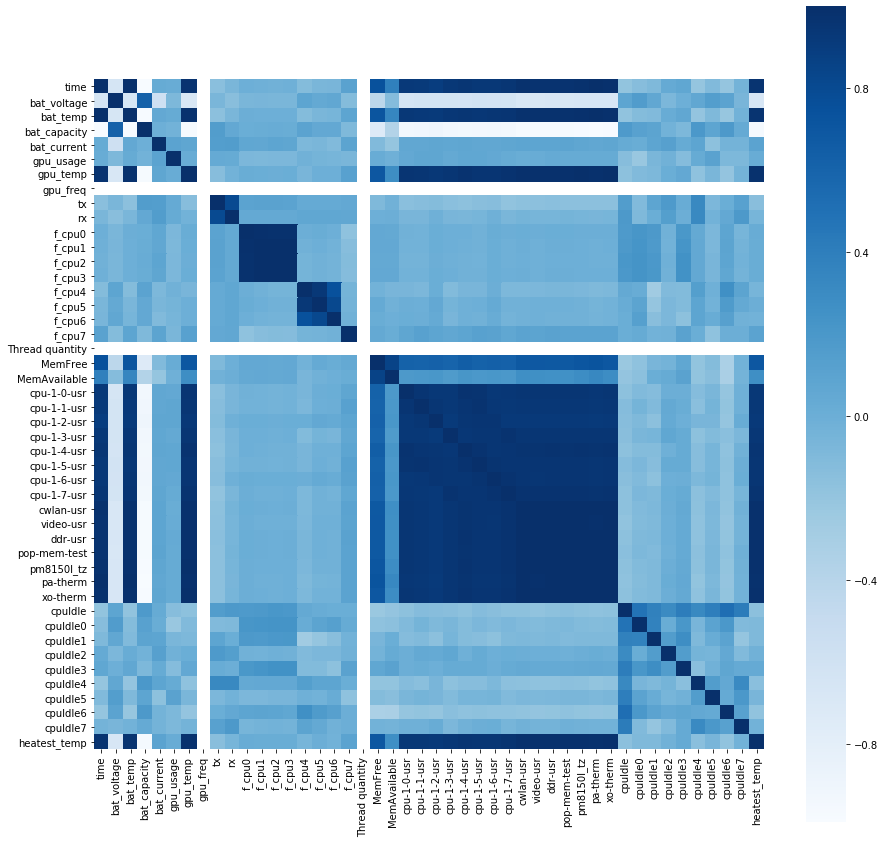

In [201]:
plt.subplots(figsize=(15, 15))
sns.heatmap(DataSet.corr(), vmax=1, square=True, cmap="Blues")
#plt.savefig('./BluesStateRelation.png')
plt.show()

### Description about DataSet
DataSet is the final data pool.

DataSet = LeftSet + RightSet

LeftSet is the statistic data which collected from Data Collector App.

RightSet is the temperature data which abstracted from heat map photos.

**There are already plenty of important features in the pool:**

1. time: format is hhmmss
2. battery: current voltage, current, temperature, capacity
3. GPU: usage, temp, frequency
4. network: tx (upload speed), rx (download speed)
5. CPU Frequency: CPU0 ~ CPU7
6. thread quantity
7. memory: free size, available size
8. CPU Temperature: CPU0 ~ CPU7 (cpu-1-x-usr)
9. WIFI IC Temperature (cwlan-usr)
10. temperature relates to video (video-user, I don't know which hardware generates this temperature)
11. temperature relates to DDR of memory (DDR-usr)
12. temperature relates to memory (pop-mem-test)
13. temperature relates to power manager IC (pm8150l_tz)
14. temperature relates to power amplifier (pa-therm)
15. CPU idle percentage (cpuIdle, cpuidle0 ~ 7)
16. ground truth, surface temperature from smartphone (heatest_temp)

### Above part is data preprocessing

# =======================================================

### Below part is the ML model
#### How to use:
Step1: Grab features you need from DataSet to get the "X" and "y" set. "y" is the groud true set.

Step2: Pick the ML model you like, have fun : )





# Hellow World model example




## Training a Linear Regression Model



### X and y arrays

In [202]:
X = DataSet[['time', 'bat_voltage', 'bat_temp', 'bat_capacity', 'bat_current',
       'gpu_usage', 'gpu_temp', 'gpu_freq', 'tx', 'rx', 'f_cpu0', 'f_cpu1',
       'f_cpu2', 'f_cpu3', 'f_cpu4', 'f_cpu5', 'f_cpu6', 'f_cpu7',
       'Thread quantity', 'MemFree', 'MemAvailable', 'cpu-1-0-usr',
       'cpu-1-1-usr', 'cpu-1-2-usr', 'cpu-1-3-usr', 'cpu-1-4-usr',
       'cpu-1-5-usr', 'cpu-1-6-usr', 'cpu-1-7-usr', 'cwlan-usr', 'video-usr',
       'ddr-usr', 'pop-mem-test', 'pm8150l_tz', 'pa-therm', 'xo-therm',
       'cpuIdle', 'cpuIdle0', 'cpuIdle1', 'cpuIdle2', 'cpuIdle3', 'cpuIdle4',
       'cpuIdle5', 'cpuIdle6', 'cpuIdle7']]
y = DataSet['heatest_temp']

### Train Test Split

In [203]:
from sklearn.model_selection import train_test_split

In [204]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

### Creating and Training the Model

In [205]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(X_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

### Model Evaluation

In [206]:
# print the intercept
print(lm.intercept_)

226.993511265


In [207]:
coeff_df = pd.DataFrame(lm.coef_,X.columns,columns=['Coefficient'])
coeff_df

,Coefficient
time,-1.371343e-03
bat_voltage,1.036954e-02
bat_temp,1.291389e-01
bat_capacity,-2.120234e-01
bat_current,5.776079e-04
gpu_usage,-6.001785e-01
gpu_temp,-2.089830e-01
gpu_freq,4.682407e-11
tx,4.695073e-01
rx,-2.814162e-01


### Predictions from our Model

In [208]:
predictions = lm.predict(X_test)

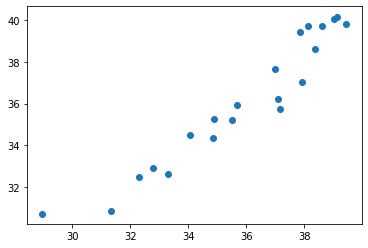

In [209]:
plt.scatter(y_test,predictions)

/Users/xiaoyangzhang/anaconda3/lib/python3.6/site-packages/seaborn/distributions.py:214: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  color=hist_color, **hist_kws)


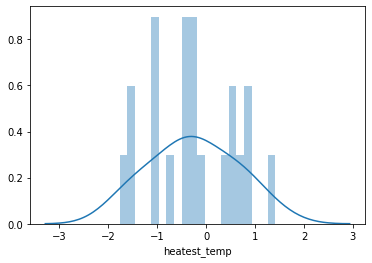

In [210]:
sns.distplot((y_test-predictions),bins=20);

### Regression Evaluation Metrics


Here are three common evaluation metrics for regression problems:

**Mean Absolute Error** (MAE) is the mean of the absolute value of the errors:

$$\frac 1n\sum_{i=1}^n|y_i-\hat{y}_i|$$

**Mean Squared Error** (MSE) is the mean of the squared errors:

$$\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2$$

**Root Mean Squared Error** (RMSE) is the square root of the mean of the squared errors:

$$\sqrt{\frac 1n\sum_{i=1}^n(y_i-\hat{y}_i)^2}$$

Comparing these metrics:

- **MAE** is the easiest to understand, because it's the average error.
- **MSE** is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world.
- **RMSE** is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are **loss functions**, because we want to minimize them.

In [211]:
from sklearn import metrics

In [212]:
print('MAE:', metrics.mean_absolute_error(y_test, predictions))
print('MSE:', metrics.mean_squared_error(y_test, predictions))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, predictions)))

MAE: 0.75329919936
MSE: 0.803618371005
RMSE: 0.896447639857
